In [39]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
import pandas as pd

Text(0, 0.5, 'y')

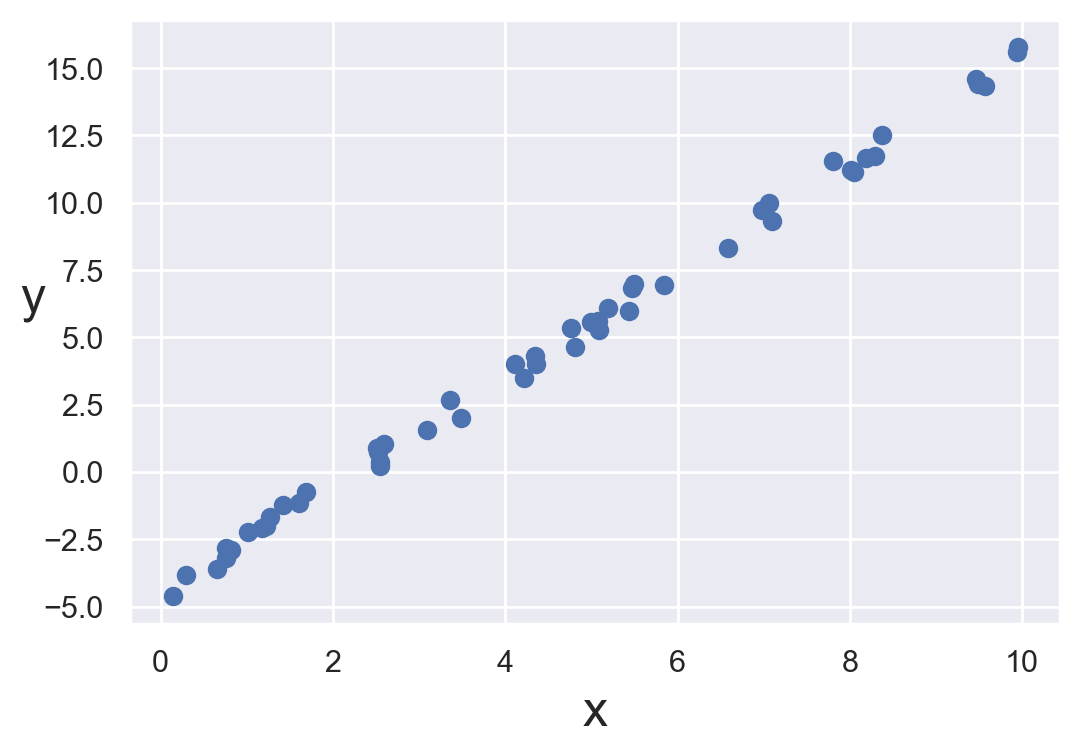

In [41]:
rng = np.random.RandomState()
x = 10 * rng.rand(50)
#like; y=2*x-5 equation in Maths
y=2*x-5+rng.rand(50)
plt.figure(dpi=200)
plt.scatter(x, y);
plt.xlabel('x', fontsize=18)
plt.ylabel('y', rotation=0, fontsize=18)

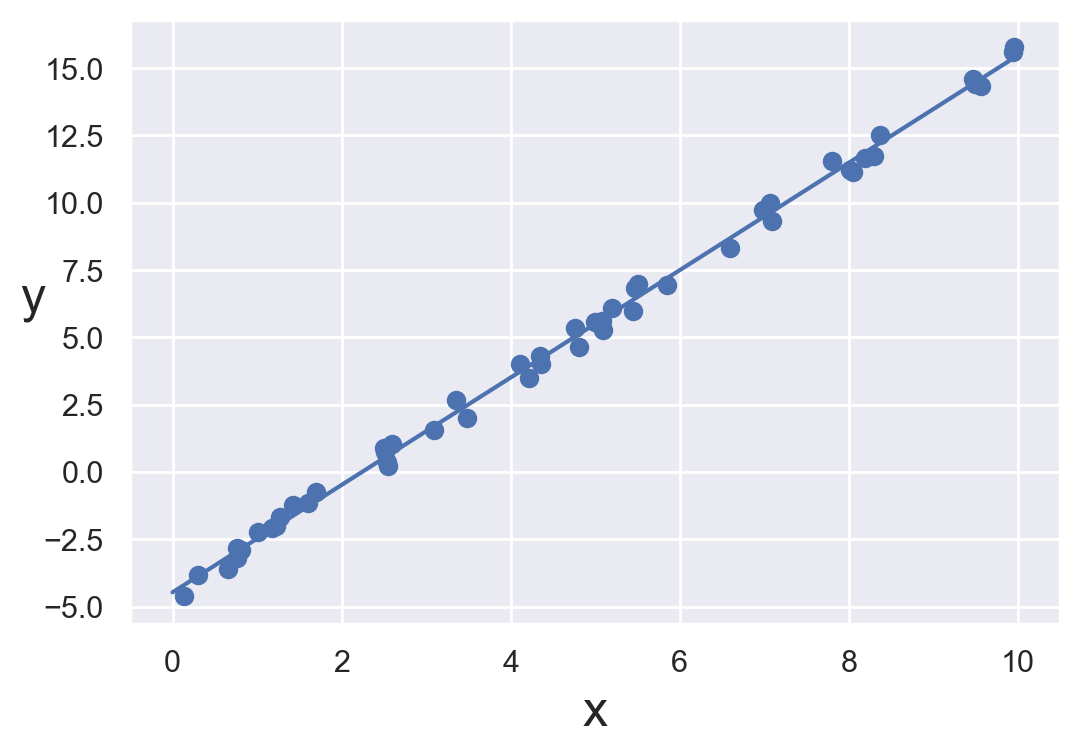

In [45]:
from sklearn.linear_model import LinearRegression
#intercept true denilmesi ile bias, kesiişim değerimizi de tutmaya yarıyor
model = LinearRegression(fit_intercept=True)
#model fit etmek için; dot_production -> verimizi gerekli şekilde boyut değiştiriyor.
#x ve y değerlerimize göre 
model.fit(x[:, np.newaxis], y)
#newaxis ?? x ve y değerlerine göre xfit ve yfit değerler oluşturuluyor
#1000 değer üzerinden lineer  değer oluştur
xfit = np.linspace(0, 10, 1000)
#tahminleme y değeri için
yfit = model.predict(xfit[:, np.newaxis])
#plot çizme
plt.figure(dpi=200)
plt.scatter(x, y)
plt.xlabel('x', fontsize=18)
plt.ylabel('y', rotation=0, fontsize=18)
plt.plot(xfit, yfit)

In [46]:
print("Model eğimi:    ", model.coef_[0])
print("Model kesişimi:", model.intercept_)

Model eğimi:     1.9944836384368572
Model kesişimi: -4.47115394338798


In [47]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
X

array([[ 2.32731853],
       [ 2.83050124],
       [-1.29829539],
       [-2.94217552],
       [ 2.03599341],
       [-0.74730538],
       [-1.56255289],
       [-2.17461972],
       [-2.9107575 ],
       [-1.44126939],
       [-0.20330836],
       [ 1.6318164 ],
       [-0.4872498 ],
       [ 1.65921534],
       [ 2.75971519],
       [-1.74903807],
       [-2.16935095],
       [-1.89189406],
       [ 2.20239712],
       [-1.90038679],
       [ 1.27394925],
       [-2.66446905],
       [ 1.40728209],
       [-1.60067253],
       [-0.15919019],
       [ 2.83430426],
       [-2.07509733],
       [-1.04068887],
       [ 2.48736319],
       [-0.96392448],
       [-1.17361966],
       [-0.15570355],
       [-0.76063129],
       [ 0.84266363],
       [-2.70718816],
       [-2.90045721],
       [-1.11932468],
       [ 1.98960551],
       [-0.92322751],
       [ 2.66222001],
       [ 0.01950039],
       [ 0.91022535],
       [-1.16225608],
       [-0.36421392],
       [-1.91699849],
       [ 0

In [48]:
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)
y

array([[ 5.31064432],
       [ 8.80261882],
       [ 2.25234507],
       [ 4.14258528],
       [ 3.74947655],
       [-0.09959256],
       [ 1.52575604],
       [ 2.51275983],
       [ 4.33476186],
       [ 2.18330495],
       [ 2.99252794],
       [ 3.90170267],
       [ 1.73987756],
       [ 4.70941756],
       [ 9.10929997],
       [ 2.29295469],
       [ 1.72459795],
       [ 1.82153878],
       [ 7.64639696],
       [ 1.82615892],
       [ 5.38187104],
       [ 2.01266652],
       [ 4.2699045 ],
       [ 1.34832487],
       [ 1.00461831],
       [10.16760165],
       [ 2.38160976],
       [ 2.76883969],
       [ 7.33369276],
       [-0.18993914],
       [ 1.42242474],
       [-0.56051551],
       [ 2.17381253],
       [ 4.59643703],
       [ 3.75750294],
       [ 2.8806018 ],
       [ 1.38318845],
       [ 6.31603288],
       [ 1.67558986],
       [ 9.4382016 ],
       [ 2.411143  ],
       [ 3.22857333],
       [ 0.8274075 ],
       [ 1.44678261],
       [ 1.5452394 ],
       [ 4

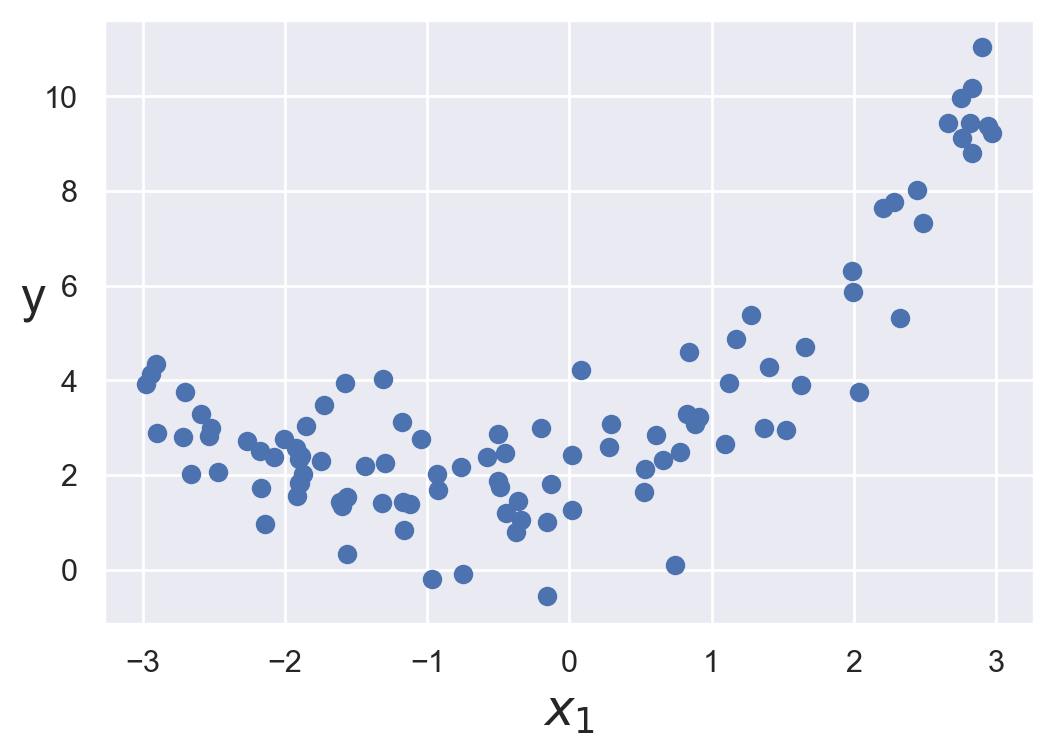

In [49]:
plt.figure(dpi=200)
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel('y', rotation=0, fontsize=18)
plt.scatter(X, y)

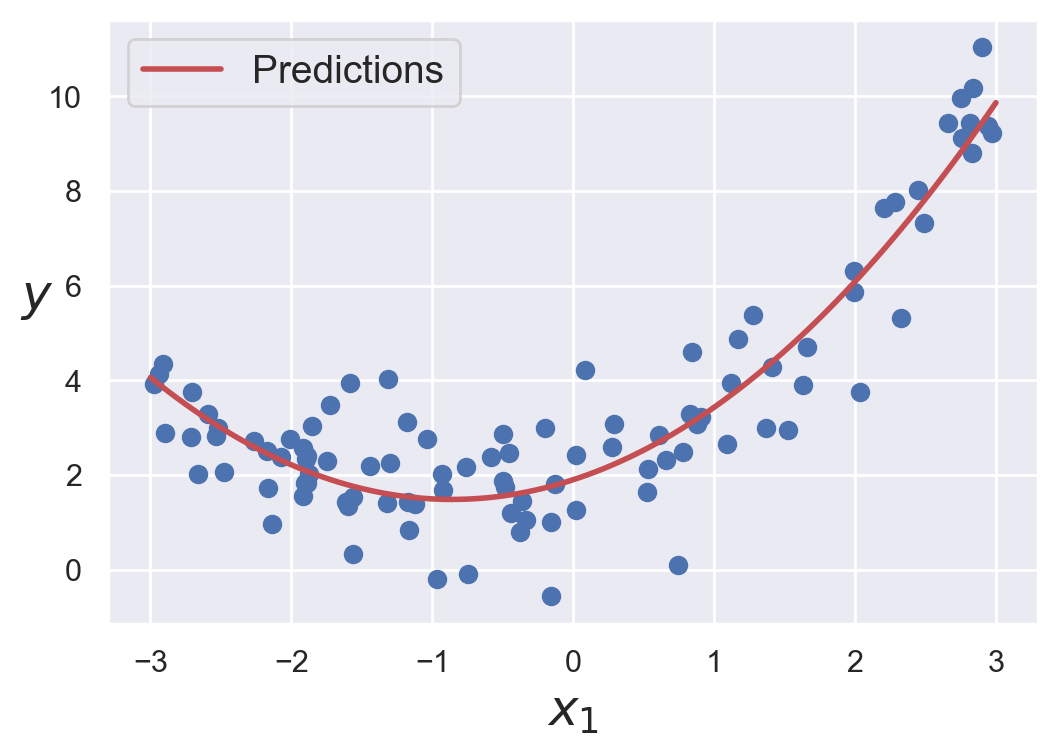

In [50]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
#degree=2 -> X**2
polynomial_regression = Pipeline([
        ("poly_features", PolynomialFeatures(degree=2, include_bias=False)),
        ("lin_reg", LinearRegression()),
    ])

polynomial_regression.fit(X, y)
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
y_newbig = polynomial_regression.predict(X_new)
plt.figure(dpi=200)
plt.scatter(X, y)
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.plot(X_new, y_newbig, "r-", linewidth=2, label="Predictions")
plt.legend(loc="upper left", fontsize=14)

In [54]:
#sklearn'deki datasetleri kullanmaya yarıyor
from sklearn import datasets
iris = datasets.load_iris()
X = iris["data"][:, 3:]  # petal width
y = (iris["target"] == 2).astype(np.int)  # 1 if Iris-Virginica, else 0
#iris

In [55]:
from sklearn.linear_model import LogisticRegression
#liblinear kullanılır. 42 genel magic number :)
log_reg = LogisticRegression(solver="liblinear", random_state=42)
#fit işlemi yapılıyor
log_reg.fit(X, y)

LogisticRegression(random_state=42, solver='liblinear')

[[0.98554411 0.01445589]
 [0.98543168 0.01456832]
 [0.98531838 0.01468162]
 ...
 [0.02618938 0.97381062]
 [0.02598963 0.97401037]
 [0.02579136 0.97420864]]


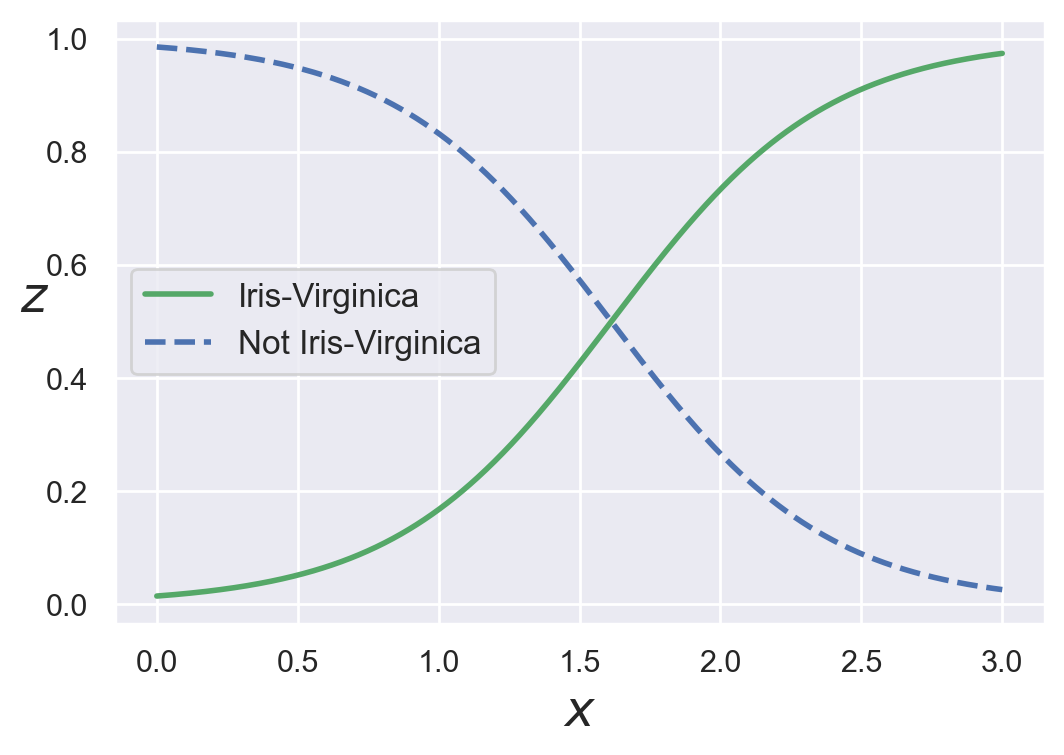

In [59]:
#0-3 arası değerleri
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
#olasılık tahminleme olduğundan predict_proba çağırılıyor.
y_proba = log_reg.predict_proba(X_new)
print(y_proba)
plt.figure(dpi=200)
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris-Virginica")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris-Virginica")
plt.xlabel("$x$", fontsize=18)
plt.ylabel("$z$", rotation=0, fontsize=18)
plt.legend(loc="center left", fontsize=12)

In [61]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
#decision_boundary-> karar sınırı, class değişim noktası
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0]

decision_boundary

array([1.61561562])

In [68]:
from sklearn import datasets
#wine dataset-> np.array
wine = datasets.load_wine()
wine_data = pd.DataFrame(wine.data, columns=wine.feature_names)
wine_data['target'] = wine['target']

wine_data.head(100)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,12.47,1.52,2.20,19.0,162.0,2.50,2.27,0.32,3.28,2.60,1.16,2.63,937.0,1
96,11.81,2.12,2.74,21.5,134.0,1.60,0.99,0.14,1.56,2.50,0.95,2.26,625.0,1
97,12.29,1.41,1.98,16.0,85.0,2.55,2.50,0.29,1.77,2.90,1.23,2.74,428.0,1
98,12.37,1.07,2.10,18.5,88.0,3.52,3.75,0.24,1.95,4.50,1.04,2.77,660.0,1


In [69]:
#y değerleri 0-1-2: 3 class var.
print(wine.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [65]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=0.3)

In [75]:
from sklearn.neighbors import KNeighborsClassifier
#neighbour deneme yanılma ile, tek ise çift tercih edilir.
#k neighbour count çift ise tek, tek ise çift fikri de yaygındır.
knn = KNeighborsClassifier(n_neighbors=7)

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

In [76]:
from sklearn import metrics
#metrics te doğruluk tespitimiz
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7222222222222222


In [77]:
#support vector machine-> x, y aralığı ile margin belirlemeye çalışıyoruz
#en yakın noktalarına margin diyoruz.
#max_margini bulmak için, 3 classifier oluşturuyoruz. sağ ve soluna bakıyoruz. 
#svvm lines en güzel ayıranı buluyoruz.
#bazı örenkler polinom gibi de olabiliyor linear olmayabilir.
#çözmek için kernel trick yapmalıyız.
#KErNEL: Linear, Polynomial, RBF(Gaussian) sigmoid fonksiyonuna benzer method.
from sklearn import datasets 
from sklearn.metrics import confusion_matrix 
from sklearn.model_selection import train_test_split 

iris = datasets.load_iris()
iris_data = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])
iris_data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [78]:
X = iris.data 
y = iris.target
print(y)
print(iris.target_names)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
['setosa' 'versicolor' 'virginica']


In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

In [84]:
from sklearn.svm import SVC 
#kernel i burada seçiyoruz.
#c-> train edilen modelde, error denilen kısmı local maxime erişildiğinde hata yapmadan regulation.
svm_model_linear = SVC(kernel = 'linear', C = 1).fit(X_train, y_train) 
svm_predictions = svm_model_linear.predict(X_test) 

In [20]:
print(X_test)
svm_predictions

[[5.8 2.8 5.1 2.4]
 [6.  2.2 4.  1. ]
 [5.5 4.2 1.4 0.2]
 [7.3 2.9 6.3 1.8]
 [5.  3.4 1.5 0.2]
 [6.3 3.3 6.  2.5]
 [5.  3.5 1.3 0.3]
 [6.7 3.1 4.7 1.5]
 [6.8 2.8 4.8 1.4]
 [6.1 2.8 4.  1.3]
 [6.1 2.6 5.6 1.4]
 [6.4 3.2 4.5 1.5]
 [6.1 2.8 4.7 1.2]
 [6.5 2.8 4.6 1.5]
 [6.1 2.9 4.7 1.4]
 [4.9 3.6 1.4 0.1]
 [6.  2.9 4.5 1.5]
 [5.5 2.6 4.4 1.2]
 [4.8 3.  1.4 0.3]
 [5.4 3.9 1.3 0.4]
 [5.6 2.8 4.9 2. ]
 [5.6 3.  4.5 1.5]
 [4.8 3.4 1.9 0.2]
 [4.4 2.9 1.4 0.2]
 [6.2 2.8 4.8 1.8]
 [4.6 3.6 1.  0.2]
 [5.1 3.8 1.9 0.4]
 [6.2 2.9 4.3 1.3]
 [5.  2.3 3.3 1. ]
 [5.  3.4 1.6 0.4]
 [6.4 3.1 5.5 1.8]
 [5.4 3.  4.5 1.5]
 [5.2 3.5 1.5 0.2]
 [6.1 3.  4.9 1.8]
 [6.4 2.8 5.6 2.2]
 [5.2 2.7 3.9 1.4]
 [5.7 3.8 1.7 0.3]
 [6.  2.7 5.1 1.6]]


array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2])

In [85]:
#score hesaplama için X ve Y test parametrelerini veriyoruz. lineer kernel ile %97 doğruluk oranıyla erişiyoruzç
accuracy = svm_model_linear.score(X_test, y_test)
accuracy
#svm hem regression hem classification olarak kullanabiliyoruz.


0.9736842105263158

In [91]:
#hyper vm de maximum margini ayırmaya çalışıyoruz. 
#epsilon değerini kullanarak regression sağlıyoruz
#amacımız, hyper plan içine olabildiğince X değerlerini dahil edebilmek.
dataset = pd.read_csv('./datasets/Position_Salaries.csv')
print(dataset.head())
X = dataset.iloc[:,1:2].values.astype(float)
print(X)
y = dataset.iloc[:,2:3].values.astype(float)
print(y)


Position  Level  Salary
0   Business Analyst      1   45000
1  Junior Consultant      2   50000
2  Senior Consultant      3   60000
3            Manager      4   80000
4    Country Manager      5  110000
[[ 1.]
 [ 2.]
 [ 3.]
 [ 4.]
 [ 5.]
 [ 6.]
 [ 7.]
 [ 8.]
 [ 9.]
 [10.]]
[[  45000.]
 [  50000.]
 [  60000.]
 [  80000.]
 [ 110000.]
 [ 150000.]
 [ 200000.]
 [ 300000.]
 [ 500000.]
 [1000000.]]


In [93]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)
print(X)
print(y)

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]
[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


In [94]:
from sklearn.svm import SVR
#rbf kernel kullanıyoruz.
regressor = SVR(kernel='rbf')
regressor.fit(X,y)

SVR()

In [96]:
y_pred = regressor.predict([[6.5]])
y_pred

array([0.01150915])

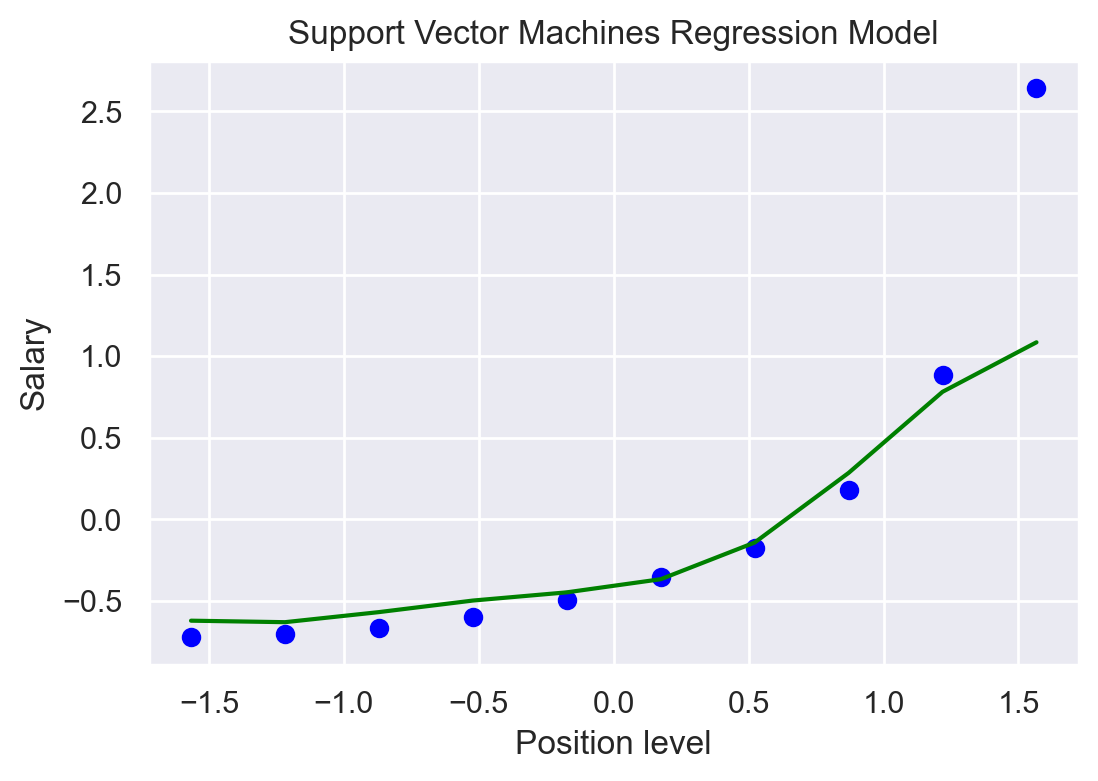

In [98]:
plt.figure(dpi=200)
plt.scatter(X, y, color = 'blue')
#yeşil çigi modelimizi gösteriyor.
plt.plot(X, regressor.predict(X), color = 'green')
plt.title('Support Vector Machines Regression Model')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

In [99]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [101]:
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
pima = pd.read_csv("./datasets/pima-indians-diabetes.csv")
pima.columns = col_names
pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [103]:
feature_cols = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']
X = pima[feature_cols] # Features
y = pima.label # Target variable

In [104]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [105]:
#default value gi
#criterion=entropy mi kullacağız, max_depth=3
clf = DecisionTreeClassifier()

clf = clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)

In [106]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.696969696969697


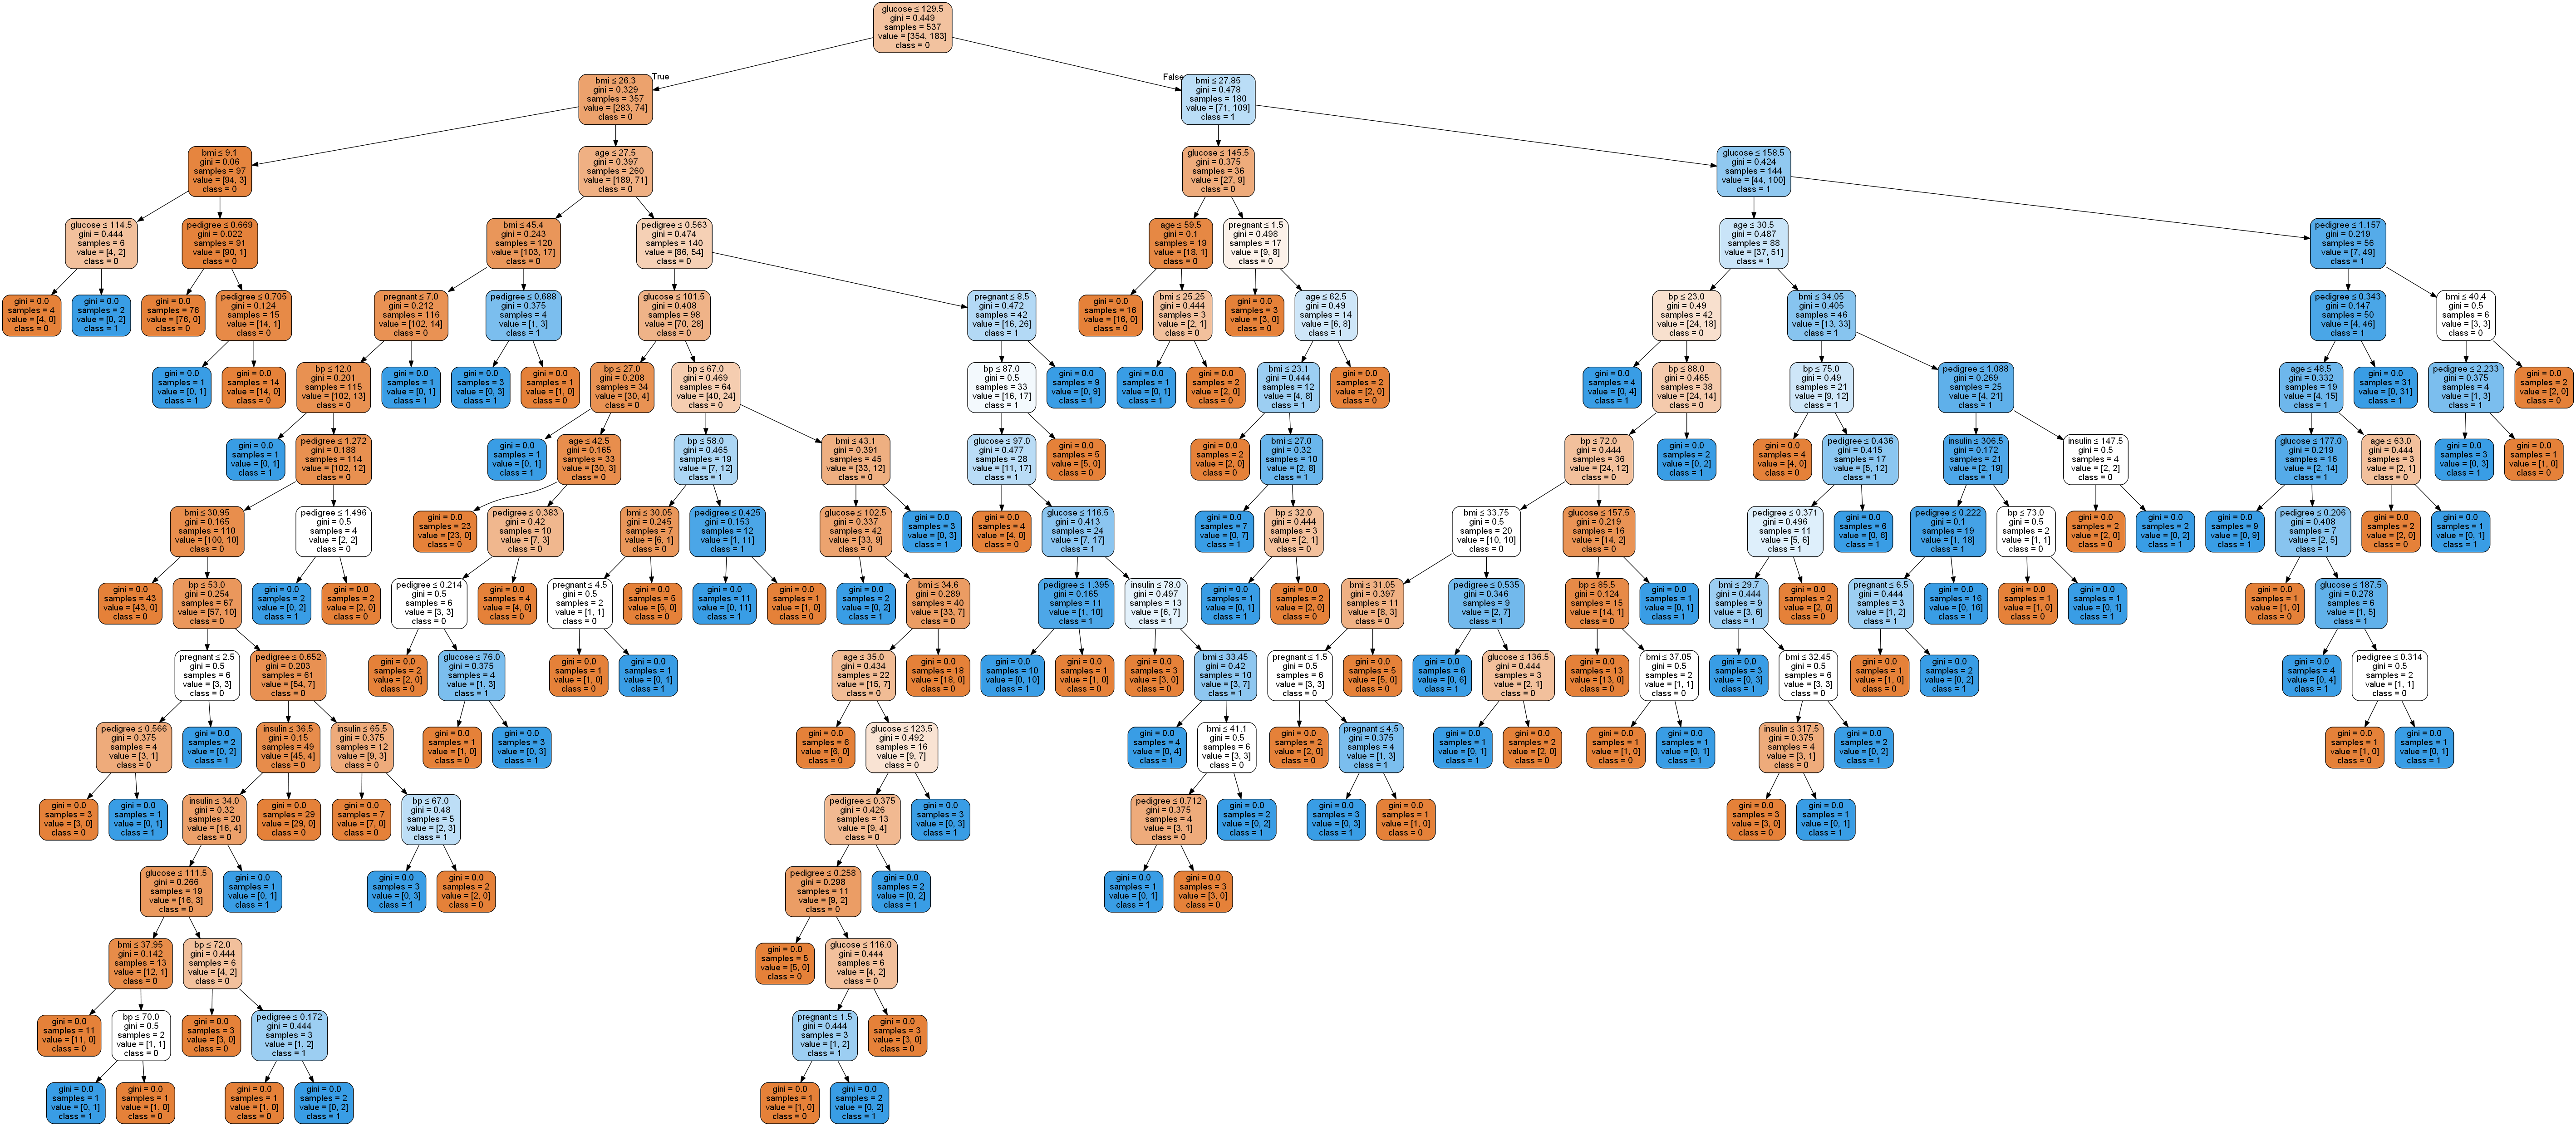

In [107]:

from sklearn.tree import export_graphviz
import six  
from IPython.display import Image  
import pydotplus

dot_data = six.StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes_1.png')
Image(graph.create_png())

In [108]:
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

clf = clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7705627705627706


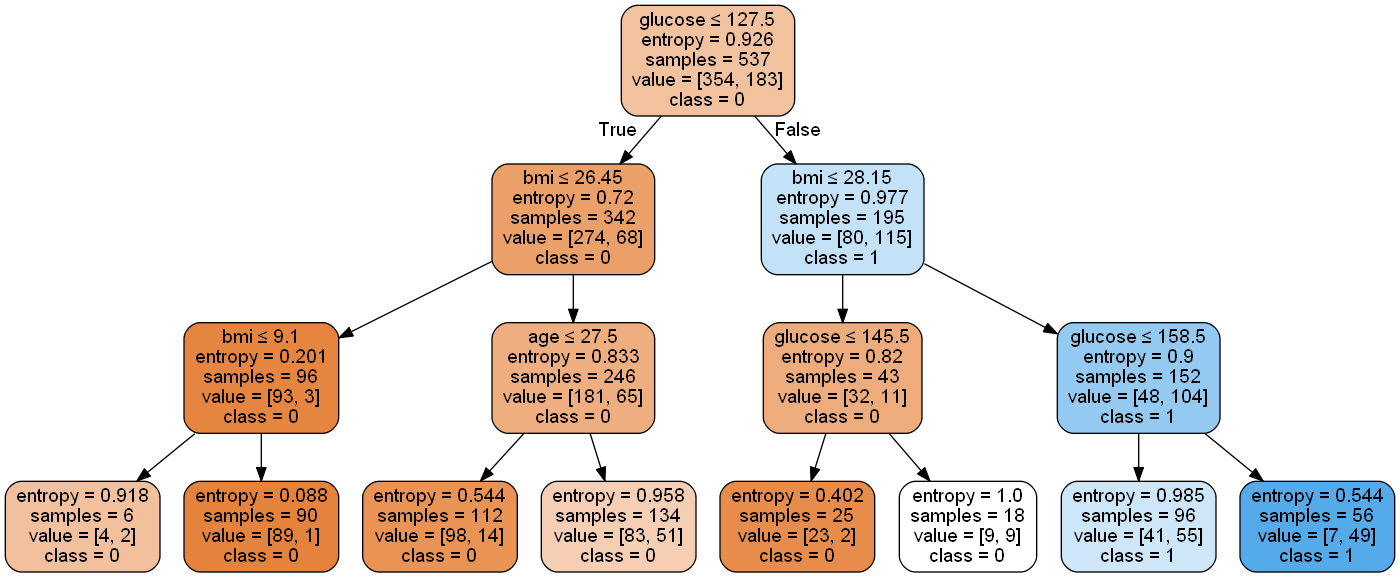

In [109]:
from six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(clf, 
                out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, 
                feature_names = feature_cols,class_names=['0','1']
               )

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes_2.png')
Image(graph.create_png())

In [116]:
#MSE
dataset = np.array(
[['Asset Flip', 100, 1000],
['Text Based', 500, 3000],
['Visual Novel', 1500, 5000],
['2D Pixel Art', 3500, 8000],
['2D Vector Art', 5000, 6500],
['Strategy', 6000, 7000],
['First Person Shooter', 8000, 15000],
['Simulator', 9500, 20000],
['Racing', 12000, 21000],
['RPG', 14000, 25000],
['Sandbox', 15500, 27000],
['Open-World', 16500, 30000],
['MMOFPS', 25000, 52000],
['MMORPG', 30000, 80000]
])

dataset

array([['Asset Flip', '100', '1000'],
       ['Text Based', '500', '3000'],
       ['Visual Novel', '1500', '5000'],
       ['2D Pixel Art', '3500', '8000'],
       ['2D Vector Art', '5000', '6500'],
       ['Strategy', '6000', '7000'],
       ['First Person Shooter', '8000', '15000'],
       ['Simulator', '9500', '20000'],
       ['Racing', '12000', '21000'],
       ['RPG', '14000', '25000'],
       ['Sandbox', '15500', '27000'],
       ['Open-World', '16500', '30000'],
       ['MMOFPS', '25000', '52000'],
       ['MMORPG', '30000', '80000']], dtype='<U20')

In [117]:
X = dataset[:,1:2].astype(int)
X

array([[  100],
       [  500],
       [ 1500],
       [ 3500],
       [ 5000],
       [ 6000],
       [ 8000],
       [ 9500],
       [12000],
       [14000],
       [15500],
       [16500],
       [25000],
       [30000]])

In [120]:
y = dataset[:,2].astype(int)
y

array([ 1000,  3000,  5000,  8000,  6500,  7000, 15000, 20000, 21000,
       25000, 27000, 30000, 52000, 80000])

In [122]:
from sklearn.tree import DecisionTreeRegressor

regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(X, y)

DecisionTreeRegressor(random_state=0)

In [123]:
y_pred = regressor.predict([[3750]])

print("Predicted price: % d\n"% y_pred)

Predicted price:  8000



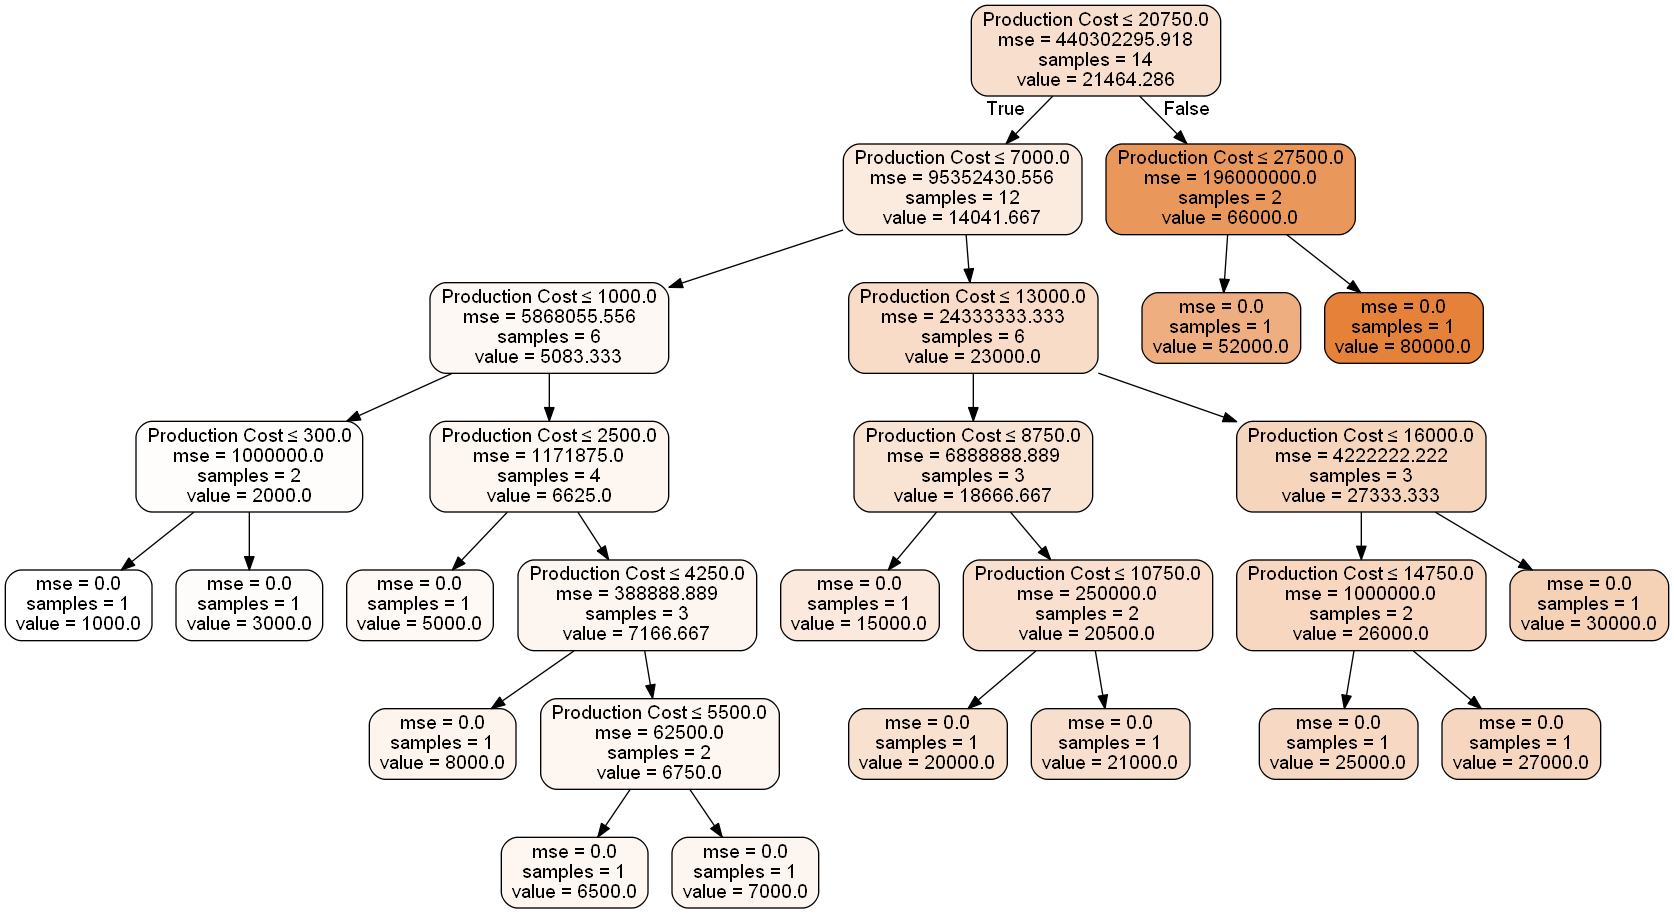

In [124]:
dot_data = StringIO()
export_graphviz(regressor, 
                out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, 
                feature_names = ['Production Cost']
               )

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('regression_tree.png')
Image(graph.create_png())

In [ ]:
#Ensemble METHODS & Random Forest

In [127]:
#Voiting Classifiers
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=500, noise=0.30, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [129]:
X

array([1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,

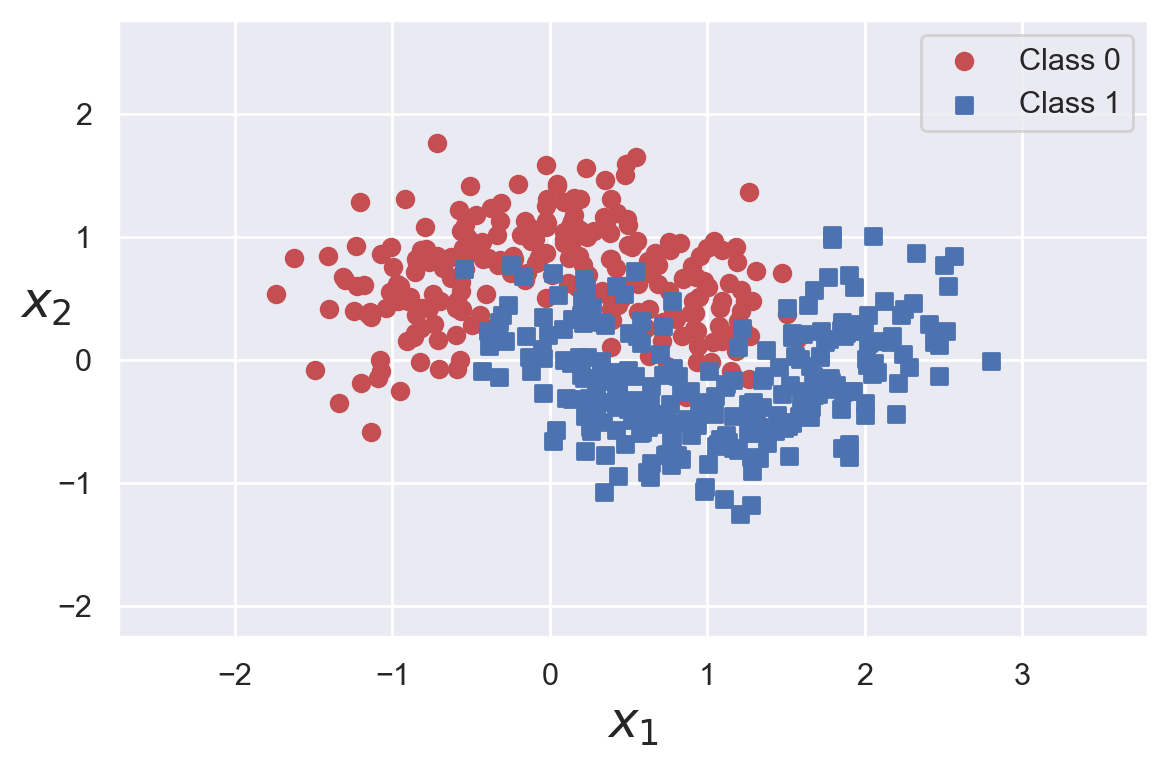

In [130]:
plt.figure(dpi=200)
plt.scatter(X[y == 0, 0], X[y == 0, 1],
            c='r', marker='o', label='Class 0')
plt.scatter(X[y == 1, 0], X[y == 1, 1],
            c='b', marker='s', label='Class 1')

plt.xlim(X[:, 0].min()-1, X[:, 0].max()+1)
plt.ylim(X[:, 1].min()-1, X[:, 1].max()+1)
plt.xlabel('$x_1$', fontsize=18)
plt.ylabel('$x_2$', rotation=0, fontsize=18)
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [133]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

log_clf = LogisticRegression(solver="liblinear", random_state=42)
rnd_clf = RandomForestClassifier(n_estimators=10, random_state=42)
svm_clf = SVC(gamma="auto", random_state=42)

voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
    voting='hard')

In [134]:
from sklearn.metrics import accuracy_score
#multi ensebmle methods so use for loop
for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))
#VotingClassifier : aggregate result is best

LogisticRegression 0.864
RandomForestClassifier 0.872
SVC 0.888
VotingClassifier 0.896


In [137]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_clf = BaggingClassifier(
    DecisionTreeClassifier(random_state=42), n_estimators=500,
    max_samples=100, bootstrap=True, n_jobs=-1, random_state=42)
bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)

In [138]:

from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.904


In [139]:
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)
y_pred_tree = tree_clf.predict(X_test)
print(accuracy_score(y_test, y_pred_tree))

0.856


In [140]:
#RANDOM FOREST
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
iris = load_iris()
rnd_clf = RandomForestClassifier(n_estimators=500, n_jobs=-1, random_state=42)
rnd_clf.fit(iris["data"], iris["target"])
for name, score in zip(iris["feature_names"], rnd_clf.feature_importances_):
    print(name, score)

sepal length (cm) 0.11249225099876375
sepal width (cm) 0.02311928828251033
petal length (cm) 0.4410304643639577
petal width (cm) 0.4233579963547682


In [141]:
#aldığımız feature ın model üzerindeki etkisi:
rnd_clf.feature_importances_

array([0.11249225, 0.02311929, 0.44103046, 0.423358  ])

In [ ]:
#RANDOM Forest Regression:

In [144]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_squared_error
import seaborn as sns

In [145]:
data_df=pd.read_csv("./datasets/Random-Forest-Regression-Data.csv")
data_df.head()

,x,y
0,59.000000,152.553428
1,88.696970,158.420441
2,87.443939,154.189316
3,110.090909,161.136969
4,126.787879,158.819572


In [146]:
x=data_df.x.values.reshape(-1,1)
y=data_df.y.values.reshape(-1,1)
print(x)
print(y)

[[  59.        ]
 [  88.6969697 ]
 [  87.44393939]
 [ 110.09090909]
 [ 126.78787879]
 [ 148.48484848]
 [ 168.18181818]
 [ 187.87878788]
 [ 207.57575758]
 [ 227.27272727]
 [ 246.96969697]
 [ 266.66666667]
 [ 286.36363636]
 [ 306.06060606]
 [ 325.75757576]
 [ 345.45454545]
 [ 365.15151515]
 [ 384.84848485]
 [ 404.54545455]
 [ 424.24242424]
 [ 443.93939394]
 [ 463.63636364]
 [ 483.33333333]
 [ 503.03030303]
 [ 522.72727273]
 [ 542.42424242]
 [ 562.12121212]
 [ 581.81818182]
 [ 601.51515152]
 [ 621.21212121]
 [ 640.90909091]
 [ 660.60606061]
 [ 680.3030303 ]
 [ 700.        ]
 [ 719.6969697 ]
 [ 739.39393939]
 [ 759.09090909]
 [ 778.78787879]
 [ 798.48484848]
 [ 818.18181818]
 [ 837.87878788]
 [ 857.57575758]
 [ 877.27272727]
 [ 896.96969697]
 [ 916.66666667]
 [ 936.36363636]
 [ 956.06060606]
 [ 975.75757576]
 [ 995.45454545]
 [1015.15151515]
 [1034.84848485]
 [1054.54545455]
 [1074.24242424]
 [1093.93939394]
 [1113.63636364]
 [1133.33333333]
 [1153.03030303]
 [1172.72727273]
 [1192.4242424

In [147]:
X_train, X_test,y_train,y_test=train_test_split(x,y, test_size=0.3, random_state=42)

In [148]:
x

array([[  59.        ],
       [  88.6969697 ],
       [  87.44393939],
       [ 110.09090909],
       [ 126.78787879],
       [ 148.48484848],
       [ 168.18181818],
       [ 187.87878788],
       [ 207.57575758],
       [ 227.27272727],
       [ 246.96969697],
       [ 266.66666667],
       [ 286.36363636],
       [ 306.06060606],
       [ 325.75757576],
       [ 345.45454545],
       [ 365.15151515],
       [ 384.84848485],
       [ 404.54545455],
       [ 424.24242424],
       [ 443.93939394],
       [ 463.63636364],
       [ 483.33333333],
       [ 503.03030303],
       [ 522.72727273],
       [ 542.42424242],
       [ 562.12121212],
       [ 581.81818182],
       [ 601.51515152],
       [ 621.21212121],
       [ 640.90909091],
       [ 660.60606061],
       [ 680.3030303 ],
       [ 700.        ],
       [ 719.6969697 ],
       [ 739.39393939],
       [ 759.09090909],
       [ 778.78787879],
       [ 798.48484848],
       [ 818.18181818],
       [ 837.87878788],
       [ 857.575

In [149]:
rf_reg=RandomForestRegressor()
rf_reg.fit(X_train, y_train)

RandomForestRegressor()

In [151]:
y_pred=rf_reg.predict(X_test)
y_pred

array([172.4649952 , 167.64045714, 172.36616822, 164.99284313,
       164.84420502, 161.53548428, 159.19118584, 170.04542229,
       157.59488027, 155.74023879, 159.6772541 , 161.81077762,
       167.84955416, 163.17855823, 175.60692936, 159.82980842,
       170.36045847, 171.44736847, 156.11525046, 162.57325881,
       166.55838691, 174.82234948, 161.72964533, 164.37741783,
       171.04168611, 157.60290929, 163.74956463, 173.35034018,
       157.76779625, 170.93598463])

In [152]:
print("Test Accuracy = ", rf_reg.score(X_test, y_test))

Test Accuracy =  0.8687142602597273
